# Pràctica 9: Naive Bayes


## Introducció

Els models Naive Bayes són un grup d’algoritmes de classificació extremadament ràpids i senzills que sovint són adequats per a conjunts de dades de molt alta dimensió.

Com que són tan ràpids i tenen tan pocs paràmetres, acaben sent molt útils com a ràpid baseline per a un problemes de classificació senzills.

Aquesta secció se centrarà en una explicació intuïtiva de com funcionen els classificadors ingenus de Bayes.


### Classificació bayesiana

Els classificadors de Bayes ingenus es basen en el teorema de Bayes, que és una equació que descriu la relació de probabilitats condicionals de quantitats estadístiques.

A la classificació bayesiana, ens interessa trobar la probabilitat d'una etiqueta donades algunes característiques observades, que podem escriure com $ P (y ~|~ X) $.

El teorema de Bayes ens explica com expressar-ho en termes de quantitats que podem calcular més directament:

$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}
                                 {P(x_1, \dots, x_n)}
$$

Utilitzant l'assumpció ingenua d'independencia condicional, podem simplificar la relació per tot $i$.

$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}
$$

Ja que $P(x_1, \dots, x_n)$ és constant donada una entrada, es pot utilitzar la següent simplificació, que será donarà un resultat proporcional al real, per tant, tindrem la mateixa sortida.

$$ P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) $$

La classificació final s'obtindrà:

$$ \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y) $$


Tingueu en compte que $P (y)$ també s’anomena **probabilitat de classe** i $P (x_i | y)$ s’anomena **probabilitat condicional**. 

Els diferents classificadors ingenus de Bayes es diferencien principalment pels supòsits que fan sobre la distribució de $P (x_i | y)$. 

Intentem aplicar la fórmula anterior manualment al nostre conjunt de dades meteorològiques. 
    

### Exemple:

Anem a veure un exemple [(extret d'aquesta web)](https://www.geeksforgeeks.org/naive-bayes-classifiers/). Considereu aquestes dades meteorològiques:

In [1]:
import pandas as pd
import numpy as np

dataGolf = pd.read_csv('playgolf.csv', delimiter=';')
display(dataGolf)

,Outlook,Temperature,Humidity,Windy,PlayGolf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


<font color='blue'> Calcula la freqüència de les decisions de jugar a golf o no jugar, segmentades per cada tipus de pronòstic (Outlook) </font>

In [2]:
print('PlayGolf: Yes')
print(((dataGolf['PlayGolf'] == 'Yes') & (dataGolf['Outlook'] == 'Sunny')).sum())
print(((dataGolf['PlayGolf'] == 'Yes') & (dataGolf['Outlook'] == 'Overcast')).sum())
print(((dataGolf['PlayGolf'] == 'Yes') & (dataGolf['Outlook'] == 'Rainy')).sum())

print('\nPlayGolf: No')
print(((dataGolf['PlayGolf'] == 'No') & (dataGolf['Outlook'] == 'Sunny')).sum())
print(((dataGolf['PlayGolf'] == 'No') & (dataGolf['Outlook'] == 'Overcast')).sum())
print(((dataGolf['PlayGolf'] == 'No') & (dataGolf['Outlook'] == 'Rainy')).sum())

print('\n', dataGolf.groupby(['Outlook', 'PlayGolf']).size())



PlayGolf: Yes
3
4
2

PlayGolf: No
2
0
3

 Outlook   PlayGolf
Overcast  Yes         4
Rainy     No          3
          Yes         2
Sunny     No          2
          Yes         3
dtype: int64


Haurem de fer algunes precomputacions al nostre conjunt de dades. Hem de trobar $P (x_i | y_j)$ per a cada $x_i$ a $X$ i $y_j$ a $y$. Tots aquests càlculs es mostren a les taules següents:


<img src="https://media.geeksforgeeks.org/wp-content/uploads/naive-bayes-classification.png" width=500>



Cada taula ha calculat $P(x_i | y_j)$ per cada $x_i$ en $X$ i $y_j$ en $y$. Per exemple, la probabilitat de jugar a golf donat que la temperatura és fresca, és a dir, $P(temperature = Cool | PlayGolf = Yes) = 3/9$.

A més, hem de trobar les probabilitats de classe ($P (y)$). Per exemple, $P (PlayGolf = Yes) = 9/14$.

Ja podem fer servir el classificador Naïve de Bayes. Per exemple, si avui tenim aquestes condicions climatològiques, jugarem al golf?

In [3]:
import numpy as np

today_golf = ['Sunny', 'Hot', 'Normal', False]
today_golf = np.array([today_golf], dtype=object)

$P(Yes|today) = \frac{P(Outlook=Sunny|Yes) P(Temperature=Hot|Yes) P(Humidity=Normal|Yes) P(Wind=False|Yes) P(Yes)}{P(today)}$

$P(No|today) = \frac{P(Outlook=Sunny|No) P(Temperature=Hot|No) P(Humidity=Normal|No) P(Wind=False|No) P(No)}{P(today)}$

Ignorem el $P(today)$ per què es comú a les dues probabilitats, i calculem:

$$P(Yes|today) \propto \frac{3}{9}·\frac{2}{9}·\frac{6}{9}·\frac{6}{9}·\frac{9}{14} \simeq 0.0212 $$


$$P(No|today) \propto \frac{2}{5}·\frac{2}{5}·\frac{1}{5}·\frac{2}{5}·\frac{5}{14} \simeq 0.0046 $$

Podem normalitzar-ho per sumar 1, 
$$P(Yes|today) = \frac{0.0212}{0.0046+0.0212}=0.82$$

$$P(No|today) = \frac{0.0046}{0.0046+0.0212}=0.18$$

Per poder-ho automatizar podem usar els classificadors bayesians del sklearn com ara el [CategoricalNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html). El problema és que les dades que li hem de passar són numèriques i haurem de recodificar la mostra matriu de dades.

El resultat no es igula ja que les dades en l'exmple gràfic no corresponen al mateix dataset

<font color='blue'> Omple els buits del següent codi per codificar de forma numèrica la base de dades i entrenar un Categorical Naive Bayes </font>

In [4]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

X_golf = dataGolf.drop("PlayGolf", axis="columns").values
y_golf = dataGolf["PlayGolf"].values

enc = OrdinalEncoder()
enc.fit(X_golf)
X_golf_encoded = enc.transform(X_golf)
display(X_golf_encoded)

model_cat = CategoricalNB(alpha=0)
model_cat.fit(X_golf_encoded, y_golf)

array([[1., 1., 0., 0.],
       [1., 1., 0., 1.],
       [0., 1., 0., 0.],
       [2., 2., 0., 0.],
       [2., 0., 1., 0.],
       [2., 0., 1., 1.],
       [0., 0., 1., 1.],
       [1., 2., 0., 0.],
       [1., 0., 1., 0.],
       [2., 2., 1., 0.],
       [1., 2., 1., 1.],
       [0., 2., 0., 1.],
       [0., 1., 1., 0.],
       [2., 2., 0., 1.]])

c:\Users\david\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\naive_bayes.py:1504: RuntimeWarning: divide by zero encountered in log
  np.log(smoothed_cat_count) - np.log(smoothed_class_count.reshape(-1, 1))


CategoricalNB(alpha=0)

Amb el model entrenat, volem fer la predicció de *today_golf*.

<font color='blue'> Quina funció de *CategoricalNB* podem utilitzar per obtenir les estimacions de probabilitat pel vector *today_golf*? </font>

In [5]:
today_golf = ['Sunny', 'Hot', 'Normal', False]
today_golf = np.array([today_golf], dtype=object)
today_golf_encoded = enc.transform(today_golf)
print(model_cat.predict_proba(today_golf_encoded))


today_golf = ['Overcast', 'Hot', 'Normal', False]
today_golf = np.array([today_golf], dtype=object)
today_golf_encoded = enc.transform(today_golf)
print(model_cat.predict_proba(today_golf_encoded))


[[0.17763158 0.82236842]]
[[0. 1.]]


Al model CategoricalNB, el paràmetre alpha controla la "suavització de Laplace". Suavitzar significa afegir un petit valor a les freqüències de cada classe per evitar problemes quan una categoria té una probabilitat zero (és a dir, quan no hi ha instàncies d'una combinació de característiques i classe en el conjunt d'entrenament).

Utilitzar alpha=1 permet que el model sigui més flexible i s'adapti millor a noves dades, mentre que alpha=0 tendeix a sobreajustar les dades d'entrenament i pot fallar en casos no observats.

<font color='blue'> Defineix un nou model *CategoricalNB* utilitzant *alpha=1*, entrena el model i fes la predicció per *today_golf_encoded*. Quina és la diferència observada? </font>

In [6]:
model_cat = CategoricalNB(alpha=0.1)
model_cat.fit(X_golf_encoded, y_golf)


today_golf = ['Sunny', 'Hot', 'Normal', False]
today_golf = np.array([today_golf], dtype=object)
today_golf_encoded = enc.transform(today_golf)
print(model_cat.predict_proba(today_golf_encoded))


today_golf = ['Overcast', 'Hot', 'Normal', False]
today_golf = np.array([today_golf], dtype=object)
today_golf_encoded = enc.transform(today_golf)
print(model_cat.predict_proba(today_golf_encoded))

[[0.1837902 0.8162098]]
[[0.00804215 0.99195785]]


### Tipus de Classificadors Naive Bayes

Els diferents tipus de classificador Naive Bayes s'utilitzen en funció de la naturalesa de les dades (continuïtat, comptes, binàries o categòriques). Cada un utilitza un model probabilístic específic que s'ajusta millor a les característiques de les dades en qüestió.

#### [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)



El Gaussian Naive Bayes s'utilitza quan tenim dades contínues que es poden modelar amb una distribució normal. Aquesta distribució es caracteritza per dos paràmetres: la mitjana ($\mu$) i la desviació estàndard ($\sigma$). La probabilitat d'una dada $x_i$ donada una classe $y$ es calcula amb la següent fórmula:


$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

On:
* $P(x_i \mid y)$ és la probabilitat de l'atribut $x_i$ donat $y$.
* $\sigma^2_y$ és la variància de la classe $y$.
* $\mu_y$ és la mitjana de la classe $y$.


#### [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes)
El Multinomial Naive Bayes és adequat per a dades que representen comptes d'ocurrències, com és el cas del text. Aquí, es compta quantes vegades apareix un terme (una paraula) en un document. La probabilitat es pot expressar com: 

$$P(x_i \mid y)\sim \hat{\theta}_{yi} · x_i = \frac{ N_{yi} + \alpha}{N_y + \alpha n} · x_i$$

On:
* $N_{yi}$ és el nombre d'instàncies del terme $i$ en la classe $y$.
* $N_{y}$ és el nombre total d'instàncies de la classe $y$.
* $\alpha$ és un paràmetre de suavitzat (Laplace smoothing).
* $n$ és el nombre total de diferents termes.


#### [Bernoulli Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes)
El Bernoulli Naive Bayes s'utilitza quan les dades són binàries, és a dir, que només poden prendre dos valors (0 o 1). La probabilitat d'un atribut $x_i$ doanda una classe $y$ es calcula amb:

$$P(x_i \mid y) = P(i \mid y) · x_i + (1 - P(i \mid y)) · (1 - x_i)$$

On:
* $P(x_i \mid y)$ és la probabilitat que l'atribut $x_i$ estigui present en la classe $y$.
* $x_i$ és un valor binari (0 o 1).

#### [Categorical Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes)
El Categorical Naive Bayes s'aplica quan les dades són categòriques (no numèriques). La probabilitat que un atribut $x_i$ prengui un valor $t$ donat una classe $y$ és:

$$P(x_i = t \mid y = c ; \alpha) = \frac{ N_{tic} + \alpha}{N_{c} + \alpha n_i}$$

On:
* $N_{tic}$ és el nombre d'instàncies on l'atribut $x_i$ és igual a $t$ i la classe és $c$.
* $N_{c}$ és el nombre total d'instàncies de la classe $c$.
* $\alpha$ és el paràmetre de suavitzat (Laplace smoothing).
* $n_i$ és el nombre de possibles valors que pot prendre l'atribut $x_i$.

### Datasets

Es faràn servir varies bases de dades per comparar els mètodes més idonis depenent del tipus de dades:

* [**playgolf**](https://medium.com/@hrishavkmr/naive-bayes-in-machine-learning-5c0972340b76) (db: `playgolf.csv`)
* [**iris**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) (db: `datasets.load_iris`)
* [**zoo**](https://www.kaggle.com/uciml/zoo-animal-classification) (db: `zoo_animal.csv`)
* [**heart-disease-uci**](https://www.kaggle.com/ronitf/heart-disease-uci) (db: `heart.csv`)
* [**20newsgroups**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html) (db: `datasets.fetch_20newsgroups`) (Al appendix veure-ho com tranformar text en caracteristiques)


## A. Ús Naive Bayes Sci-kit Learn

En aquest apartat és recomanable usar funcions pròpies per a llegir una base de dades. D'aquesta forma podreu reaprofitar molt de codi.

<font color='blue'> Omple els buits de la funció *load_dataset()* per llegir els datasets </font>



In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris, fetch_20newsgroups

def load_dataset(which):
    X, y = None, None
    if which == "iris":
        data = load_iris()
        X = data.data
        y = data.target

    elif which == "playgolf":
        data = pd.read_csv('playgolf.csv', delimiter=';')
        
        XX = data.drop("PlayGolf", axis="columns")
        y = data["PlayGolf"]

        enc = OrdinalEncoder()
        enc.fit(XX)
        X = enc.transform(XX)

    elif which == "zoo":
        data = pd.read_csv('zoo_animal.csv', delimiter=',')
        
        # X = data.drop(["animal_name", "class_type"], axis="columns").values
        X = data.drop(["animal_name"], axis="columns")
        y = data["class_type"]

    elif which == "heart-disease-uci":
        data = pd.read_csv('heart.csv', delimiter=',')
        X = data.drop(["target"], axis="columns").values
        y = data["target"]

    elif which == "20newsgroups":
        categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
        data = fetch_20newsgroups(subset='train', categories=categories)
        prep = TfidfVectorizer(max_features=100)
        X = prep.fit_transform(data.data).toarray()
        y = data.target
    else:
        raise ("UNKNOWN DATASET")
    
    return X, y
    

Donat que cada model de Naive Bayes utilitza un enfocament probabilístic específic que s'adapta millor a les característiques de les dades concretes, volem avaluar quin model funciona millor per a cadascun dels datasets de la pràctica.

<font color='blue'> Omple els buits dels bucles anidats per entrenar tots els models amb tots els conjunts de dades (utilitza la funció definida anteriorment (*load_dataset()*)). Imprimeix l'accuracy mitjana de cada model amb les mateixes dades utilitzades per l'entrenament (sense fer train_test_split). </font>

In [9]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

models = [GaussianNB(), MultinomialNB(), BernoulliNB(), CategoricalNB()]
datasets = ['iris', 'playgolf', 'zoo', 'heart-disease-uci', '20newsgroups']

results = pd.DataFrame(columns=['dataset', 'model', 'score'])
for d in datasets:
    X, y = load_dataset(d)
    for m in models:
        model = m
        model.fit(X, y)
        r = model.score(X, y)
        results.loc[len(results)] = [d, str(m), r]
        print(f'{d} + {str(m)} = {r:.3f}')

print("DONE")

iris + GaussianNB() = 0.960
iris + MultinomialNB() = 0.953
iris + BernoulliNB() = 0.333
iris + CategoricalNB() = 0.933
playgolf + GaussianNB() = 0.857
playgolf + MultinomialNB() = 0.786
playgolf + BernoulliNB() = 0.857
playgolf + CategoricalNB() = 0.929
zoo + GaussianNB() = 1.000
zoo + MultinomialNB() = 0.970
zoo + BernoulliNB() = 0.990
zoo + CategoricalNB() = 1.000
heart-disease-uci + GaussianNB() = 0.842
heart-disease-uci + MultinomialNB() = 0.752
heart-disease-uci + BernoulliNB() = 0.832
heart-disease-uci + CategoricalNB() = 0.911
20newsgroups + GaussianNB() = 0.653
20newsgroups + MultinomialNB() = 0.698
20newsgroups + BernoulliNB() = 0.592
20newsgroups + CategoricalNB() = 0.278
DONE


Aquest fragment de codi serveix per visualitzar els resultats obtinguts després d'avaluar el rendiment de diferents models de Naive Bayes:

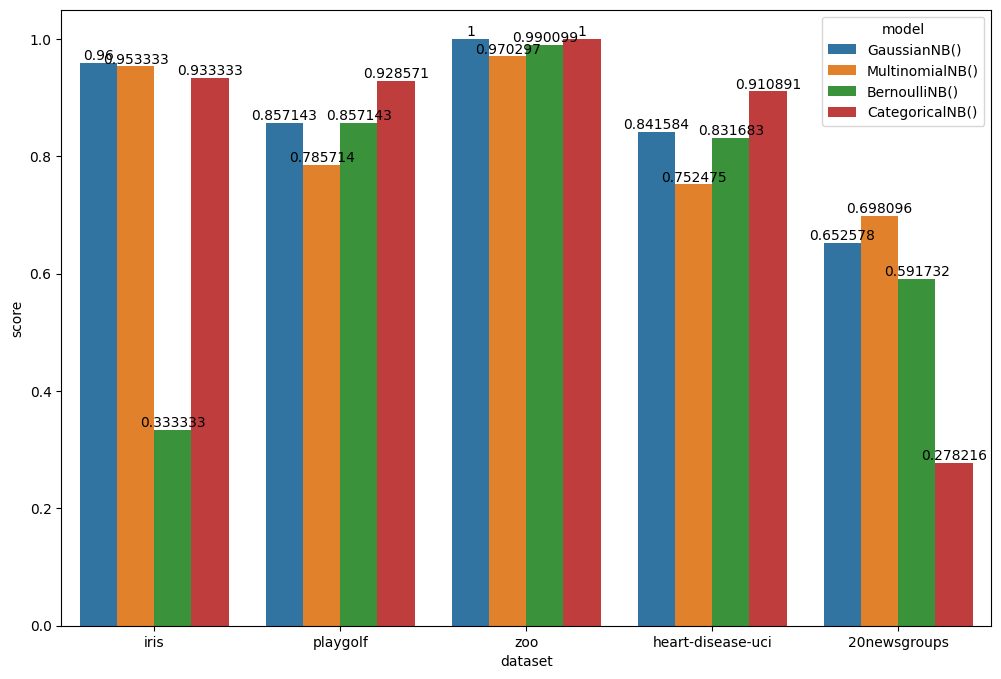

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=results,x='dataset', y='score', hue='model')
for b  in ax.containers:
    ax.bar_label(b)
plt.show()



### Observacions
1. **Iris:** Un dataset clàssic de classificació que conté característiques de flors, com la longitud i amplada del sèpal i el pètal.
    * **Gaussian Naive Bayes:** Aquest model és adequat perquè les característiques són contínues i s'assumeix que segueixen una distribució normal. Els resultats mostren un rendiment excel·lent (0.960), el que confirma la seva efectivitat amb dades contínues.
2. **playgolf:** Un dataset que conté decisions sobre si jugar a golf basat en el clima (temperatura, humitat, vent, etc.).
    * **Categorical Naive Bayes**. Les característiques són categòriques, així que aquest model és apropiat per tractar variables discretes. El seu bon rendiment (0.929) indica que el model pot captar bé les relacions entre les variables i la decisió de jugar o no.
3. **zoo:** Un dataset que classifica animals segons diverses característiques (nombre de potes, tipus de sang, etc.).
    * **Categorical Naive Bayes**. Les característiques són categòriques, així que aquests models són apropiats per tractar variables discretes. El fet que **GaussianNB** funcioni tan bé suggereix que les dades poden estar distribuïdes de manera que compleixin les suposicions de normalitat. **Bernoulli Naive Bayes** obté un resultat casi perfecte; això és degut a que moltes de les característiques del dataset son binàries.
4. **heart-disease-uci**: Un dataset que conté informació sobre pacients amb diferents característiques de salut i si tenen malaltia cardíaca.
    * **GaussianNB** es comporta raonablement bé (0.842), indicant que algunes de les característiques contínues es poden aproximar a una distribució normal. **CategoricalNB** té el millor score (0.911), cosa que indica que s'ajusta millor a la naturalesa de les dades, probablement perquè s'adapta bé a les variables categòriques i contínues presents al dataset.
5. **20newsgroups**: Un dataset de text que classifica documents de notícies en diferents grups temàtics.
    * **Multinomial Naive Bayes** és el model que funciona millor, com s'esperaria per a un dataset de text on es tracten freqüències de paraules. Això s'alinea amb la naturalesa del problema, ja que aquest model està dissenyat per treballar amb dades de comptatge.

<font color='blue'> Fes el mateix amb train_test_split </font>

In [11]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

models = [GaussianNB(), MultinomialNB(), BernoulliNB(), CategoricalNB()]
datasets = ['iris', 'playgolf', 'zoo', 'heart-disease-uci', '20newsgroups']

results = pd.DataFrame(columns=['dataset', 'model', 'score'])
for d in datasets:
    if d=='heart-disease-uci': continue
    X, y = load_dataset(d)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for m in models:
        model = m
        model.fit(X_train, y_train)
        r = model.score(X_test, y_test)
        results.loc[len(results)] = [d, str(m), r]
        print(f'{d} + {str(m)} = {r:.3f}')

print("DONE")

iris + GaussianNB() = 1.000
iris + MultinomialNB() = 0.900
iris + BernoulliNB() = 0.300
iris + CategoricalNB() = 0.967
playgolf + GaussianNB() = 0.667
playgolf + MultinomialNB() = 0.667
playgolf + BernoulliNB() = 0.667
playgolf + CategoricalNB() = 0.333
zoo + GaussianNB() = 0.952
zoo + MultinomialNB() = 0.952
zoo + BernoulliNB() = 0.952
zoo + CategoricalNB() = 0.952
20newsgroups + GaussianNB() = 0.601
20newsgroups + MultinomialNB() = 0.701
20newsgroups + BernoulliNB() = 0.575
20newsgroups + CategoricalNB() = 0.255
DONE


## B. Implementació Naive Bayes

En aquest apartat implementarem un classificador Naïve de Bayes per cada un dels tipus de dades. Per fer això, i que sigui fàcil de comparar amb els resultats del apartat anterior, feu servir un esquelet similar al següent:
        


### Naive Bayes Base

Explicació teòrica de la classe NaiveBayes amb el dataset *zoo_animal.csv*.

* **Càlcul de probabilitats a priori (*calculate_priors*)**: La probabilitat a priori $P(y)$ representa la probabilitat de cada classe (Yes o No) al conjunt de dades d'entrenament, independentment de les característiques. La probabilitat a priori $P(y)$ per cada classe es calcula com:

$$P(y = \text{Yes}) = \frac{\text{nombre de 'Yes'}}{\text{nombre total d'exemples}}$$
$$P(y = \text{No}) = \frac{\text{nombre de 'No'}}{\text{nombre total d'exemples}}$$


<font color='blue'> Omple els buits de la classe *NaiveBayes* </font>

In [12]:
class NaiveBayes:
    def __init__(self):
        self.num_samples = 0
        self.class_counts = []  # Nombre d'exemples en cada categoria
        self.class_priors = []  # Probabilitat a priori per a cada categoria
        self.classes = []       # Etiquetes de cada classe
    
    def __str__(self):
        return f"{self.__class__.__name__}()"
        
    def get_data_agregation(self, X: np.ndarray, y: np.ndarray):
        """
        Calcula i emmagatzema les estadístiques necessàries per a la distribució de les característiques condicionals per classe.
        """
        raise NotImplementedError("Aquesta funció ha de ser implementada a cada subclasse")
    
    def calculate_log_likelihood(self, X: np.ndarray) -> np.ndarray:
        """
        Calcula la probabilitat posteriori logarítmica no normalitzada de X.
        """
        raise NotImplementedError("Aquesta funció ha de ser implementada a cada subclasse")

    def calculate_priors(self, y: np.ndarray):
        """
        Calcula les probabilitats a priori de cada classe.
        
        Parameters:
        y (np.ndarray): Vector d'etiquetes de classe.
        
        Returns:
        None. Actualitza self.class_priors i self.class_counts.
        """
        self.class_counts = [np.sum(y == cls) for cls in self.classes]
        self.class_priors = np.array(self.class_counts) / np.sum(self.class_counts)

    def predict(self, X: np.ndarray) -> np.ndarray:
        probs = self.predict_proba(X)
        return self.classes[np.argmax(probs, axis=1)]
    
    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        probs = np.exp(self.predict_log_proba(X))
        probs /= np.sum(probs, axis=1, keepdims=True)
        return probs

    def predict_log_proba(self, X: np.ndarray) -> np.ndarray:
        log_probs = self.calculate_log_likelihood(X)
        for i, prior in enumerate(self.class_priors):
            log_probs[:, i] += np.log(prior)
        return log_probs

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        return np.mean(self.predict(X) == y)
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.num_samples = X.shape[0]
        self.classes = np.unique(y)
        self.calculate_priors(y)
        self.get_data_agregation(X, y)

### Categorical Naive Bayes

<font color='blue'> Omple els buits de la classe heredada *CategoricalNaiveBayes* </font>

In [13]:
class CategoricalNaiveBayes(NaiveBayes):
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = alpha 
        self.feature_counts = []  # Conteig d'ocurrències per valor de característica en cada classe
    
    def get_data_agregation(self, X: np.ndarray, y: np.ndarray):
        """
        Calcula la probabilitat condicional de cada valor de cada característica donada la classe.
        
        Parameters:
        X (np.ndarray): Matriu d'exemples (mostres x característiques).
        y (np.ndarray): Vector d'etiquetes de classe.
        
        Returns:
        None. Actualitza self.feature_counts amb els valors comptats.
        """
        n_classes = len(self.classes)
        n_features = X.shape[1]

        # Inicialitza el conteig de característiques per classe i per valor de característica
        self.feature_counts = [[] for _ in range(n_classes)]
        # Per cada classe, calcular les probabilitats condicionals
        for class_index, cls in enumerate(self.classes):
            idx = y == cls  # Índex dels exemples de la classe actual
            
            # Inicialitza un diccionari per cada característica
            self.feature_counts[class_index] = [{} for _ in range(n_features)]
            for feature_index in range(n_features):
                # Obtenir els valors de la característica actual per a la classe actual
                feature_values = X[idx, feature_index]
                
                # Comptar les ocurrències de cada valor de la característica
                unique_values, counts = np.unique(feature_values, return_counts=True)
                
                # Emmagatzemar el conteig ajustat per alpha
                for value, count in zip(unique_values, counts):
                    self.feature_counts[class_index][feature_index][value] = count + self.alpha
                # Afegeix alpha a cada valor possible per aplicació de Laplace en cas que no aparegui
                all_values = np.unique(X[:, feature_index])
                for value in all_values:
                    if value not in self.feature_counts[class_index][feature_index]:
                        self.feature_counts[class_index][feature_index][value] = self.alpha

    def calculate_log_likelihood(self, X: np.ndarray) -> np.ndarray:
        """
        Calcula la probabilitat condicional logarítmica de X per a cada classe.

        Parameters:
        X (np.ndarray): Matriu d'exemples (mostres x característiques).

        Returns:
        np.ndarray: Matriu de probabilitats logarítmiques (mostres x classes).
        """
        log_likelihood = np.zeros((X.shape[0], len(self.classes)))
        for class_index, cls in enumerate(self.classes):
            for feature_index in range(X.shape[1]):
                # Obtenir els valors de la característica actual per a la classe actual
                feature_counts = self.feature_counts[class_index][feature_index]
                total_feature_count = sum(feature_counts.values())
                # Calcular la log-probabilitat per a cada mostra
                for sample_index in range(X.shape[0]):
                    value = X[sample_index, feature_index]
                    # Utilitzar el conteig amb Laplace smoothing
                    count = feature_counts.get(value, self.alpha)
                    log_likelihood[sample_index, class_index] += np.log(count / total_feature_count)
        return log_likelihood

Volem verificar si la classe *CategoricalNaiveBayes* que hem desenvolupat té un comportament similar al model *CategoricalNB* de *scikit-learn*.

<font color='blue'>Utilitza el dataset *playgolf* per entrenar tots dos models i compara els resultats de les prediccions per *today_golf*. Imprimeix les probabilitats i les classes predites per a cada model.</font>

In [14]:
X_golf = dataGolf.drop("PlayGolf", axis="columns").values
y_golf = dataGolf["PlayGolf"].values

enc = OrdinalEncoder()
enc.fit(X_golf)
X_golf_encoded = enc.transform(X_golf)

today_golf = ['Sunny', 'Hot', 'Normal', False]
today_golf_encoded = enc.transform([today_golf])

# Crear y entrenar el model CategoricalNaiveBayes propi
cnb = CategoricalNaiveBayes(alpha=1.0)
cnb.fit(X_golf_encoded, y_golf)
# Crear y entrenar el model CategoricalNB de Sklearn
cnb_sklearn = CategoricalNB(alpha=1.0)
cnb_sklearn.fit(X_golf_encoded, y_golf)


# Predir la probabilitat de today_golf
proba_today_golf = cnb.predict_proba(today_golf_encoded)
print("Probabilitats predictives per 'today_golf':", proba_today_golf)
proba_today_golf_sklearn = cnb_sklearn.predict_proba(today_golf_encoded)
print("Probabilitats predictives (Scikit-Learn) per 'today_golf':", proba_today_golf_sklearn)

# Predir la classe de today_golf
predicted_class = cnb.predict(today_golf_encoded)
print("Predicció per 'today_golf':", predicted_class)
predicted_class_sklearn = cnb_sklearn.predict(enc.transform([today_golf]))
print("Predicció (Scikit-Learn) per 'today_golf':", predicted_class_sklearn)


Probabilitats predictives per 'today_golf': [[0.22086561 0.77913439]]
Probabilitats predictives (Scikit-Learn) per 'today_golf': [[0.22086561 0.77913439]]
Predicció per 'today_golf': ['Yes']
Predicció (Scikit-Learn) per 'today_golf': ['Yes']


### Gaussian Naive Bayes

<font color='blue'> Omple els buits de la classe heredada *GaussianNaiveBayes* </font>

In [15]:
import numpy as np

class GaussianNaiveBayes(NaiveBayes):
    def __init__(self):
        super().__init__()
        self.means = None
        self.variances = None
    
    def get_data_agregation(self, X: np.ndarray, y: np.ndarray):
        """
        Calcula la mitjana i la variància de cada característica per cada classe sense suavitzat.
        
        Parameters:
        X (np.ndarray): Matriu d'exemples (mostres x característiques).
        y (np.ndarray): Vector d'etiquetes de classe.
        
        Returns:
        None. Actualitza self.means i self.variances amb les estadístiques calculades.
        """
        n_classes = len(self.classes)
        n_features = X.shape[1]
        
        # Inicialitza matrius per a les mitjanes i les variàncies
        self.means = np.zeros((n_classes, n_features))
        self.variances = np.zeros((n_classes, n_features))
        
        # Per cada classe, calcula la mitjana i la variància de cada característica
        for class_index, cls in enumerate(self.classes):
            X_class = X[y == cls]
            self.means[class_index, :] = X_class.mean(axis=0)
            self.variances[class_index, :] = X_class.var(axis=0)
    
    def calculate_log_likelihood(self, X: np.ndarray) -> np.ndarray:
        """
        Calcula la probabilitat condicional logarítmica de X per a cada classe.
        
        Parameters:
        X (np.ndarray): Matriu d'exemples (mostres x característiques).
        
        Returns:
        np.ndarray: Matriu de probabilitats logarítmiques (mostres x classes).
        """
        n_samples, n_features = X.shape
        log_likelihood = np.zeros((n_samples, len(self.classes)))
        
        # Calcula la probabilitat logarítmica per cada classe
        for class_index in range(len(self.classes)):
            mean = self.means[class_index]
            variance = self.variances[class_index]
            # Evitar la divisió per zero
            variance[variance == 0] = 1e-9

            # Calcula la probabilitat logarítmica per a cada característica
            # En comptes de sumar logs, fem servir np.sum per a les files
            log_prob = -0.5 * np.sum(np.log(2.0 * np.pi * variance))
            log_prob -= 0.5 * np.sum(((X - mean) ** 2) / variance, axis=1)
            log_likelihood[:, class_index] = log_prob
            
        return log_likelihood


Volem verificar si la classe *GaussianNaiveBayes* que hem desenvolupat té un comportament similar al model *GaussianNB* de *scikit-learn*.

<font color='blue'>Utilitza el dataset *playgolf* per entrenar tots dos models i compara els resultats de les prediccions per *today_golf*. Imprimeix les probabilitats i les classes predites per a cada model.</font>

In [16]:
from sklearn.metrics import accuracy_score

# Crear i entrenar el model GaussianNaiveBayes propi
gnb = GaussianNaiveBayes()
gnb.fit(X_golf_encoded, y_golf)
# Crear i entrenar el model GaussianNB de Scikit-Learn
gnb_sklearn = GaussianNB()
gnb_sklearn.fit(X_golf_encoded, y_golf)


# Predir la probabilitat de 'today_golf' amb cada model
proba_today_golf = gnb.predict_proba(today_golf_encoded)
print("Probabilitats predictives per 'today_golf' (model propi):", proba_today_golf)

proba_today_golf_sklearn = gnb_sklearn.predict_proba(today_golf_encoded)
print("Probabilitats predictives (Scikit-Learn) per 'today_golf':", proba_today_golf_sklearn)


# Predir la classe de 'today_golf' amb cada model
predicted_class = gnb.predict(today_golf_encoded)
print("Predicció per 'today_golf' (model propi):", predicted_class)

predicted_class_sklearn = gnb_sklearn.predict(today_golf_encoded)
print("Predicció (Scikit-Learn) per 'today_golf':", predicted_class_sklearn)


# Comparar l'accuracy de cada model sobre el conjunt de dades complet
predictions_gnb = gnb.predict(X_golf_encoded)
accuracy_gnb = accuracy_score(y_golf, predictions_gnb)
print("Precisió del model propi GaussianNaiveBayes:", accuracy_gnb)

predictions_sklearn = gnb_sklearn.predict(X_golf_encoded)
accuracy_sklearn = accuracy_score(y_golf, predictions_sklearn)
print("Precisió del model Scikit-Learn GaussianNB:", accuracy_sklearn)

Probabilitats predictives per 'today_golf' (model propi): [[0.12487422 0.87512578]]
Probabilitats predictives (Scikit-Learn) per 'today_golf': [[0.12487422 0.87512578]]
Predicció per 'today_golf' (model propi): ['Yes']
Predicció (Scikit-Learn) per 'today_golf': ['Yes']
Precisió del model propi GaussianNaiveBayes: 0.8571428571428571
Precisió del model Scikit-Learn GaussianNB: 0.8571428571428571


### Bernoulli Naive Bayes

In [17]:
class BernoulliNaiveBayes(NaiveBayes):
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = alpha  # Paràmetre de suavitzat de Laplace
        self.feature_probs = []  # Probabilitats de cada característica donada la classe

    def get_data_agregation(self, X: np.ndarray, y: np.ndarray):
        """
        Calcula les probabilitats condicionals de cada característica (binària) per classe.

        Parameters:
        X (np.ndarray): Matriu d'exemples (mostres x característiques).
        y (np.ndarray): Vector d'etiquetes de classe.
        
        Returns:
        None. Actualitza self.feature_probs amb les probabilitats de les característiques.
        """
        n_classes = len(self.classes)
        n_features = X.shape[1]

        # Inicialitzar la llista de probabilitats de les característiques per a cada classe
        self.feature_probs = [[] for _ in range(n_classes)]
        for class_index, cls in enumerate(self.classes):
            idx = y == cls  # Índex dels exemples de la classe actual
            
            # Calcular les probabilitats de cada característica per classe
            for feature_index in range(n_features):
                feature_values = X[idx, feature_index]
                # Comptar les ocurrències de 1 (presència) i 0 (absència)
                p_feature_1 = np.sum(feature_values) + self.alpha
                p_feature_0 = len(feature_values) - np.sum(feature_values) + self.alpha
                
                # Suavitzat de Laplace
                total = len(feature_values) + 2 * self.alpha
                p_feature_1 /= total
                p_feature_0 /= total
                
                self.feature_probs[class_index].append((p_feature_1, p_feature_0))

    def calculate_log_likelihood(self, X: np.ndarray) -> np.ndarray:
        """
        Calcula la probabilitat logarítmica de X per cada classe, basada en distribucions de Bernoulli.

        Parameters:
        X (np.ndarray): Matriu d'exemples (mostres x característiques).

        Returns:
        np.ndarray: Matriu de probabilitats logarítmiques (mostres x classes).
        """
        log_likelihood = np.zeros((X.shape[0], len(self.classes)))
        for class_index, cls in enumerate(self.classes):
            for feature_index in range(X.shape[1]):
                p_feature_1, p_feature_0 = self.feature_probs[class_index][feature_index]
                for sample_index in range(X.shape[0]):
                    value = X[sample_index, feature_index]
                    # Si el valor és 1, afegir la log-probabilitat de p_feature_1
                    # Si el valor és 0, afegir la log-probabilitat de p_feature_0
                    if value == 1:
                        log_likelihood[sample_index, class_index] += np.log(p_feature_1)
                    else:
                        log_likelihood[sample_index, class_index] += np.log(p_feature_0)
        return log_likelihood


### Multinomial Naive Bayes

In [18]:
class MultinomialNaiveBayes(NaiveBayes):
    def __init__(self, alpha=1.0):
        super().__init__()
        self.alpha = alpha  # Paràmetre de suavitzat de Laplace
        self.feature_probs = []  # Probabilitats de cada característica per classe

    def get_data_agregation(self, X: np.ndarray, y: np.ndarray):
        """
        Calcula les probabilitats condicionals de cada característica per classe, 
        assumint una distribució multinomial.

        Parameters:
        X (np.ndarray): Matriu d'exemples (mostres x característiques).
        y (np.ndarray): Vector d'etiquetes de classe.
        
        Returns:
        None. Actualitza self.feature_probs amb les probabilitats de les característiques.
        """
        n_classes = len(self.classes)
        n_features = X.shape[1]

        # Inicialitzar la llista de probabilitats de les característiques per a cada classe
        self.feature_probs = [[] for _ in range(n_classes)]
        for class_index, cls in enumerate(self.classes):
            idx = y == cls  # Índex dels exemples de la classe actual
            
            # Calcular la suma total de les característiques per classe
            class_feature_counts = np.sum(X[idx], axis=0)  # Freqüència total de cada característica per classe
            total_class_count = np.sum(class_feature_counts) + self.alpha * n_features  # Suma total amb suavitzat
            
            # Calcular les probabilitats de cada característica per classe amb suavitzat de Laplace
            for feature_index in range(n_features):
                feature_count = class_feature_counts[feature_index] + self.alpha  # Suavitzat de Laplace
                prob = feature_count / total_class_count
                self.feature_probs[class_index].append(prob)

    def calculate_log_likelihood(self, X: np.ndarray) -> np.ndarray:
        """
        Calcula la probabilitat logarítmica de X per cada classe, basada en distribucions multinomials.

        Parameters:
        X (np.ndarray): Matriu d'exemples (mostres x característiques).

        Returns:
        np.ndarray: Matriu de probabilitats logarítmiques (mostres x classes).
        """
        log_likelihood = np.zeros((X.shape[0], len(self.classes)))
        for class_index, cls in enumerate(self.classes):
            for feature_index in range(X.shape[1]):
                p_feature = self.feature_probs[class_index][feature_index]
                for sample_index in range(X.shape[0]):
                    count = X[sample_index, feature_index]
                    # La log-probabilitat es calcula per cada freqüència de la característica
                    log_likelihood[sample_index, class_index] += count * np.log(p_feature)
        return log_likelihood


## Appendix 
#### (no s'hi ha de fer res, tan sols es per si us ajuda a entendre-ho tot millor)

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*Aquesta subsecció conté parts extretes de [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; i està disponible a [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*



Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.

Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

### Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.

These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.

Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.

Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.

Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.

The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

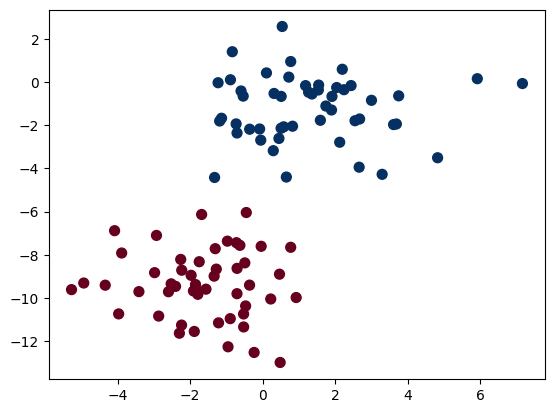

In [20]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.

This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

The result of this naive Gaussian assumption is shown in the following figure:

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.

With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

Now let's generate some new data and predict the label:

In [22]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

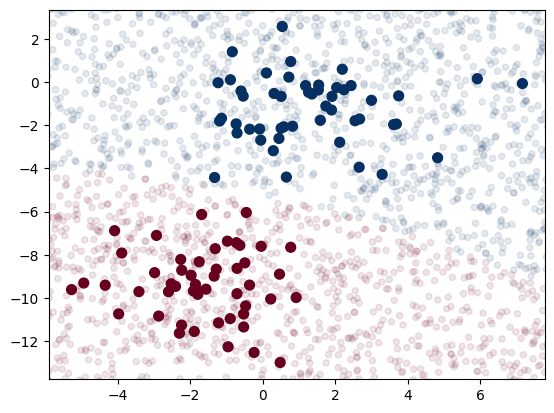

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [24]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [25]:
model.classes_

array([0, 1])

The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribution with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [26]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [27]:
categories = ['talk.religion.misc', 'soc.religion.christian',
             'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [28]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Show the distributions of lengths of the emails

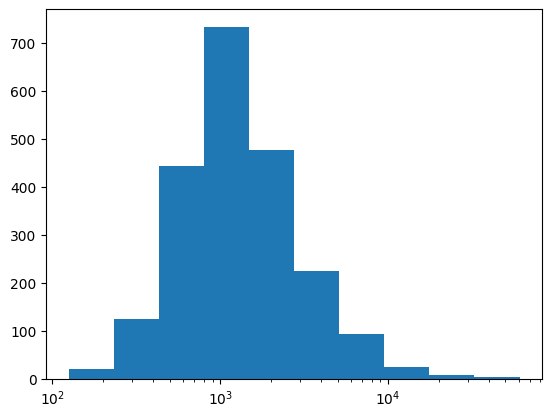

In [29]:
lens = [len(d) for d in train.data]

def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

plot_loghist(lens, 10)


In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [31]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

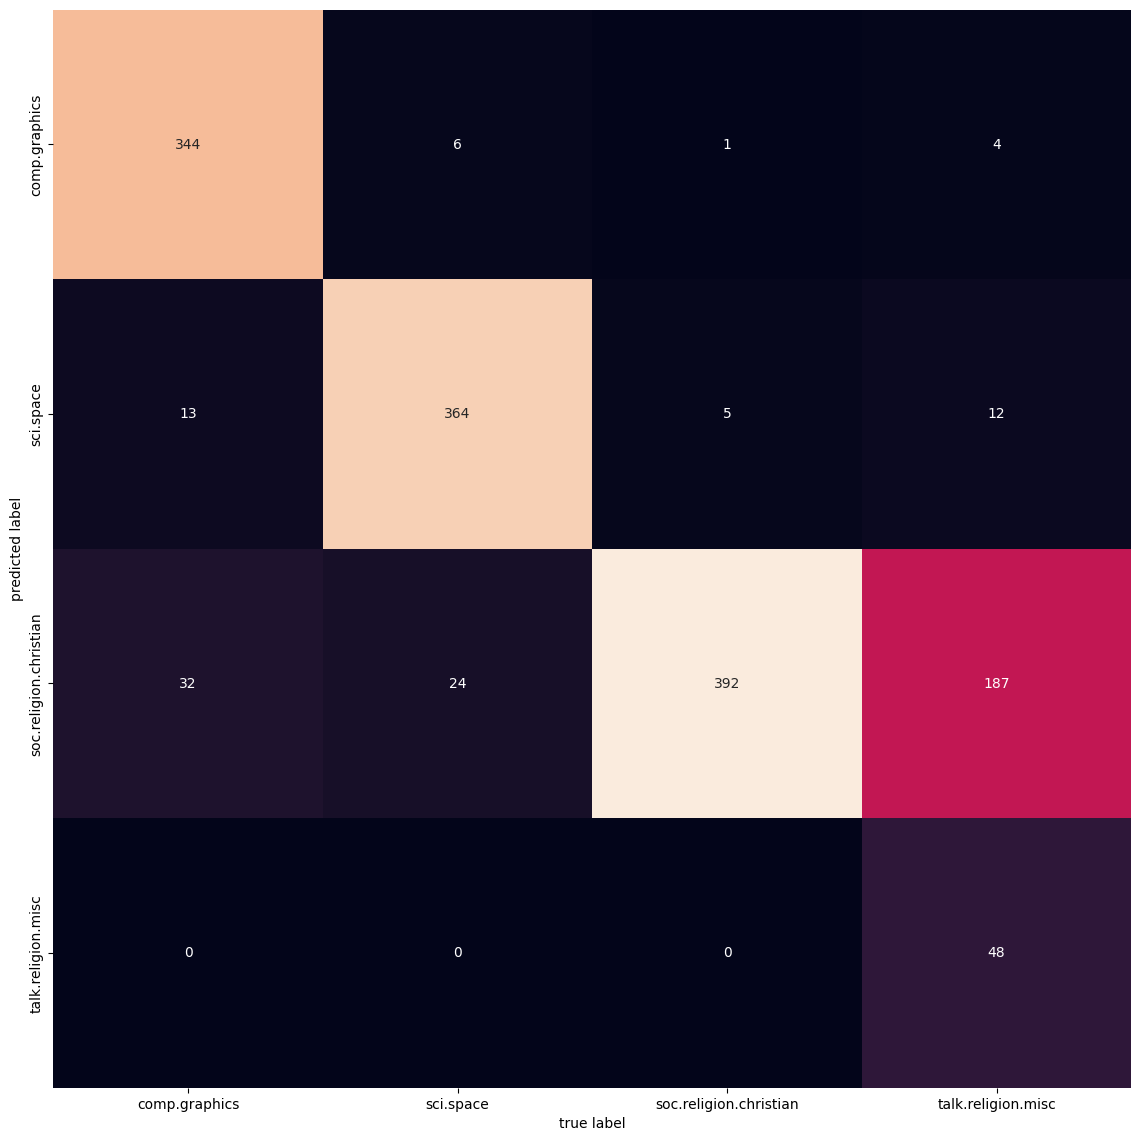

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(20,14))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [33]:
from sklearn.metrics import classification_report
print(classification_report(test.target, labels))


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



In [34]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [35]:
predict_category('sending a payload to the ISS')

'sci.space'

In [36]:
predict_category('sending bytes to the network')

'comp.graphics'

In [37]:
predict_category('sending chocolate')

'sci.space'

In [38]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [39]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.


